# Multi-Layer Regression

* In this notebook a mutli-layer model is trained to predict $\sin{x}$
* The class `PolynomialModel` inherits from `torch.nn.Module`
* it is trained using `torch.optim`

In [185]:
import typing
from typing import Any, Union, Optional, List, Dict

import math
import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import Tensor, ones
from torch.nn import Module, MSELoss, ModuleList, Sigmoid, ReLU, Identity, Tanh
from torch.optim import SGD, Optimizer

In [200]:
class MultiLayerModule (Module):
    layers: ModuleList
    layer_sizes: int

    def __init__(self, layer_sizes: List[int]):
        super().__init__()
        layer_sizes = [1] + layer_sizes + [1]
        self.layer_sizes = layer_sizes
        self.layers = ModuleList()
        for i in range(1, len(layer_sizes)):
            layer = Layer(layer_sizes[i-1], layer_sizes[i])
            if (i != len(layer_sizes)-1): layer.activation_function = Sigmoid()
            self.layers.append(layer)

    def forward(self, x: Tensor) -> Tensor:
        x = x.unsqueeze(-1).unsqueeze(-1)
        for layer in self.layers:
            x = layer(x)
        return x.squeeze(-1).squeeze(-1)


class Layer (Module):
    weights: Tensor
    activation_function: Module

    def __init__(self, input_size: int, output_size: int, activation_function: Optional[Module] = None):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.rand(
            (1, input_size+1, output_size), dtype=torch.float, requires_grad=True))
        self.activation_function = activation_function
        if self.activation_function == None: self.activation_function = lambda x: x

    def forward(self, x: Tensor) -> Tensor:
        bias_size = x.size()
        bias_size = bias_size[:-1] + (1,)
        x = torch.cat((x, ones(bias_size, dtype=torch.float)), -1)
        print(x)
        return self.activation_function(x @ self.weights)



In [207]:
l = Layer(4, 2, Sigmoid())
x = torch.rand((1,4))
out = l(x)
print(x)
print(out)

tensor([[0.9547, 0.6845, 0.8061, 0.1428, 1.0000]])
tensor([[0.9547, 0.6845, 0.8061, 0.1428]])
tensor([[[0.9235, 0.8145]]], grad_fn=<SigmoidBackward0>)


In [ ]:
import ipykernel
ipykernel.__version__

In [208]:
def fit(model: Module, x: Tensor, y: Tensor, epochs: int = 2000, criterion: Optional[Module] = None, optimizer: Optional[Optimizer] = None,
        lr: float = 1e-6) -> np.ndarray:

    if (criterion is None):
        criterion = MSELoss(reduction='sum')
    if (optimizer is None):
        optimizer = SGD(model.parameters(), lr=lr)

    loss_history: np.ndarray = np.array([])

    for t in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)
        if t % 10 == 0:
            loss_history = np.append(loss_history, loss.detach().numpy())
            print(t, loss_history[-1])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return loss_history

In [209]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype=torch.float)
y = torch.sin(x)

In [210]:
m: Module = MultiLayerModule([4,16,1])

tensor([[[-3.1416,  1.0000]],

        [[-3.1384,  1.0000]],

        [[-3.1353,  1.0000]],

        ...,

        [[ 3.1353,  1.0000]],

        [[ 3.1384,  1.0000]],

        [[ 3.1416,  1.0000]]])
tensor([[[0.6358, 0.2273, 0.1136, 0.1773, 1.0000]],

        [[0.6358, 0.2276, 0.1138, 0.1775, 1.0000]],

        [[0.6358, 0.2279, 0.1141, 0.1777, 1.0000]],

        ...,

        [[0.6482, 0.9076, 0.9308, 0.8265, 1.0000]],

        [[0.6482, 0.9077, 0.9310, 0.8267, 1.0000]],

        [[0.6482, 0.9078, 0.9311, 0.8270, 1.0000]]], grad_fn=<CatBackward0>)
tensor([[[0.7545, 0.7879, 0.8021,  ..., 0.7117, 0.7056, 1.0000]],

        [[0.7546, 0.7879, 0.8022,  ..., 0.7117, 0.7056, 1.0000]],

        [[0.7546, 0.7880, 0.8023,  ..., 0.7117, 0.7057, 1.0000]],

        ...,

        [[0.9028, 0.9274, 0.9517,  ..., 0.7856, 0.8372, 1.0000]],

        [[0.9028, 0.9274, 0.9517,  ..., 0.7857, 0.8372, 1.0000]],

        [[0.9029, 0.9274, 0.9517,  ..., 0.7857, 0.8373, 1.0000]]],
       grad_fn=<CatBackward0

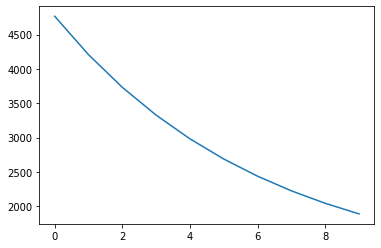

In [211]:
plt.plot(fit(m,x,y, lr=1e-6, epochs=100))

tensor([[[-3.1416,  1.0000]],

        [[-3.1384,  1.0000]],

        [[-3.1353,  1.0000]],

        ...,

        [[ 3.1353,  1.0000]],

        [[ 3.1384,  1.0000]],

        [[ 3.1416,  1.0000]]])
tensor([[[0.6358, 0.2273, 0.1136, 0.1772, 1.0000]],

        [[0.6358, 0.2276, 0.1138, 0.1775, 1.0000]],

        [[0.6358, 0.2279, 0.1141, 0.1777, 1.0000]],

        ...,

        [[0.6482, 0.9076, 0.9308, 0.8265, 1.0000]],

        [[0.6482, 0.9077, 0.9310, 0.8267, 1.0000]],

        [[0.6482, 0.9078, 0.9311, 0.8270, 1.0000]]], grad_fn=<CatBackward0>)
tensor([[[0.7545, 0.7878, 0.8021,  ..., 0.7117, 0.7056, 1.0000]],

        [[0.7546, 0.7879, 0.8022,  ..., 0.7117, 0.7056, 1.0000]],

        [[0.7546, 0.7880, 0.8023,  ..., 0.7117, 0.7057, 1.0000]],

        ...,

        [[0.9028, 0.9274, 0.9517,  ..., 0.7856, 0.8372, 1.0000]],

        [[0.9028, 0.9274, 0.9517,  ..., 0.7857, 0.8372, 1.0000]],

        [[0.9029, 0.9274, 0.9517,  ..., 0.7857, 0.8373, 1.0000]]],
       grad_fn=<CatBackward0

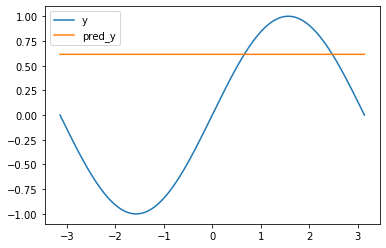

In [212]:
plt.plot(x, y, label="y")
plt.plot(x, m(x).detach(), label="pred_y")
plt.legend()